In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load("./exp1_position_classification/split_samples_X.npy")
y = np.load("./exp1_position_classification/split_samples_y.npy")

In [3]:
def get_indizes_of_position(position_number):
    return np.argwhere(y[:,0].flatten()==position_number).flatten()

def get_indizes_of_rec_sess(rec_sess_number):
    return np.argwhere(y[:,1].flatten()==rec_sess_number).flatten()

In [4]:
avg_spectogram = np.zeros((5, X.shape[1]))
for i in range(5):
    avg_spectogram[i] = np.average(X[get_indizes_of_position(i+1)], axis=0)

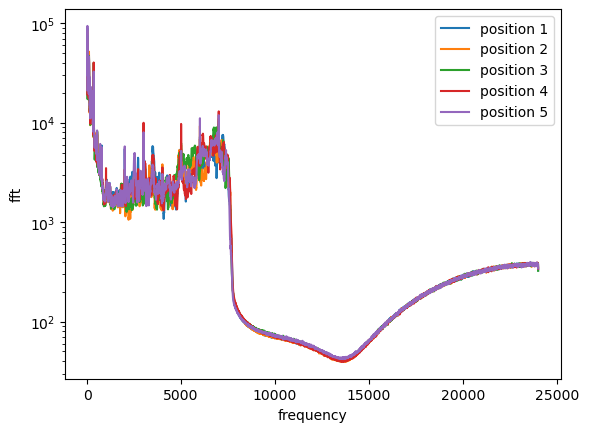

In [5]:
sample_rate = 48000
freq = np.fft.rfftfreq(8192, d=1./sample_rate)


for i in range(5):
    plt.plot(freq, (avg_spectogram[i]), label=f"position {i+1}")

plt.yscale("log")
plt.ylabel("fft")
plt.xlabel("frequency")
plt.legend()

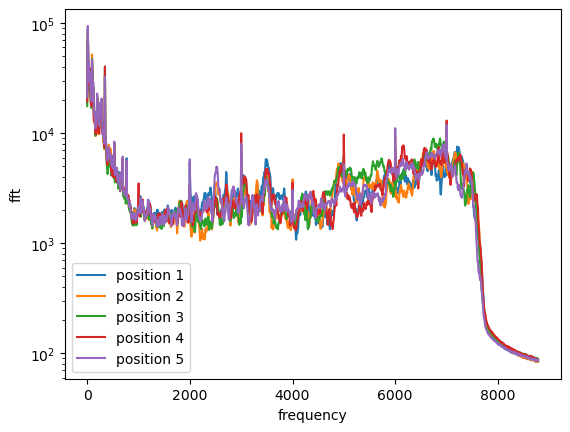

In [6]:
sample_rate = 48000
freq = np.fft.rfftfreq(8192, d=1./sample_rate)


for i in range(5):
    plt.plot(freq[:1500], (avg_spectogram[i,:1500]), label=f"position {i+1}")

plt.yscale("log")
plt.ylabel("fft")
plt.xlabel("frequency")
plt.legend()

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
std_scl = StandardScaler()
X_data = X[:, :1300]
X_scaled = std_scl.fit_transform(np.log(X_data))

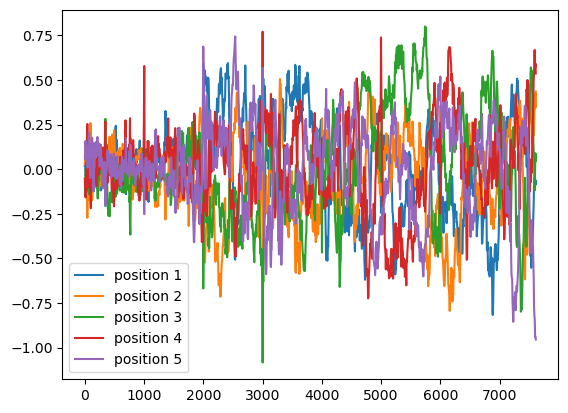

In [9]:
scaled_spect = np.zeros((5, X_scaled.shape[1]))
for i in range(5):
    scaled_spect[i] = np.average(X_scaled[get_indizes_of_position(i+1)], axis=0)

for i in range(5):
    plt.plot(freq[:1300],(scaled_spect[i]), label=f"position {i+1}")

plt.legend()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_data, y[:,0].ravel(), test_size=0.33, random_state=42)

clf1 = make_pipeline(StandardScaler(), LinearSVC())
clf1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [11]:
clf1.score(X_train, y_train)

1.0

In [12]:
clf1.score(X_test, y_test)

0.9986149584487535

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
analysis = pca.fit_transform(X_scaled)

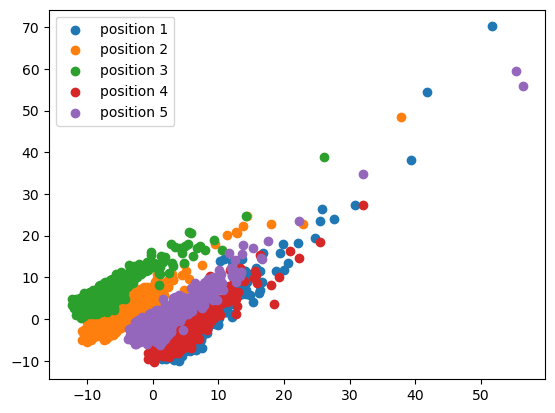

In [14]:
avg_spectogram = np.zeros((5, X.shape[1]))
for i in range(5):
    position_indizes = get_indizes_of_position(i+1)
    plt.scatter(analysis[position_indizes, 0], analysis[position_indizes, 1], label=f"position {i+1}")
plt.legend()

(-15.0, 20.0)

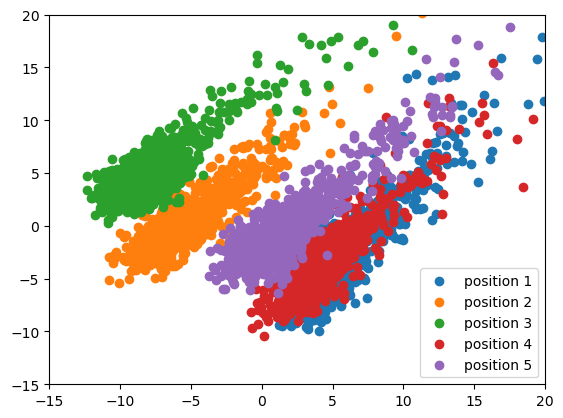

In [15]:
avg_spectogram = np.zeros((5, X.shape[1]))
for i in range(5):
    position_indizes = get_indizes_of_position(i+1)
    plt.scatter(analysis[position_indizes, 0], analysis[position_indizes, 1], label=f"position {i+1}")
plt.legend()
plt.xlim(-15,20)
plt.ylim(-15,20)

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data, y[:,1].ravel(), test_size=0.33, random_state=42)

clf2 = make_pipeline(StandardScaler(), LinearSVC())
clf2.fit(X_train2, y_train2)

/home/tilman/miniforge3/envs/acousticSensing/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [17]:
clf2.score(X_train2, y_train2)

1.0

In [18]:
clf2.score(X_test2, y_test2)

0.6461218836565097

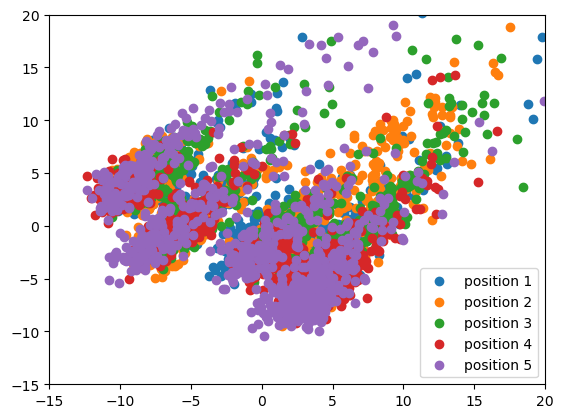

In [19]:
for i in range(5):
    rec_indizes = get_indizes_of_rec_sess(i+1)
    plt.scatter(analysis[rec_indizes, 0], analysis[rec_indizes, 1], label=f"position {i+1}")
plt.xlim(-15,20)
plt.ylim(-15,20)
plt.legend()

In [29]:
sess_5_indizes = get_indizes_of_rec_sess(5)

X_train3 = np.delete(X_data, sess_5_indizes, axis=0)
y_train3 = np.delete(y, sess_5_indizes, axis=0)[:,0].ravel()
X_test3 = X_data[sess_5_indizes]
y_test3 = y[sess_5_indizes, 0].ravel()

In [31]:
from sklearn.pipeline import Pipeline
clf3 = Pipeline([("scale", StandardScaler()), ("classifier", LinearSVC(penalty="l1"))])
clf3.fit(X_train3, y_train3)

/home/tilman/miniforge3/envs/acousticSensing/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scale', StandardScaler()),
                ('classifier', LinearSVC(penalty='l1'))])

In [32]:
clf3.score(X_train3, y_train3)

1.0

In [33]:
clf3.score(X_test3, y_test3)

0.9977142857142857

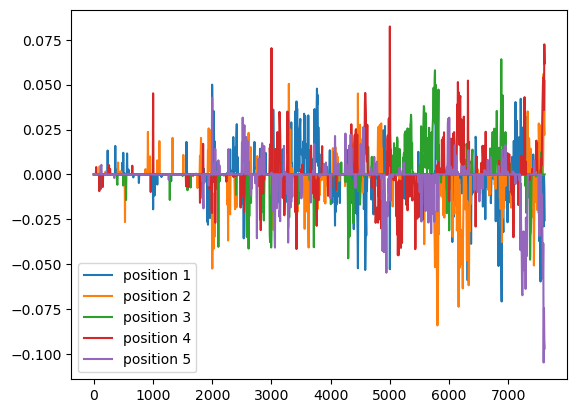

In [34]:
for i in range(5):
    plt.plot(freq[:1300],(clf3["classifier"].coef_[i]), label=f"position {i+1}")

plt.legend()